In [1]:
import numpy as np
from collections import defaultdict
from ssrt import S2RTR_DiffuseUB
import matplotlib.pyplot as plt

Computes sigma_0_vv and sigma_0_hh for a weakly scattering Rayleigh layer 
with albedo a < 0.2 and a PRISM-modeled ground surface.

Parameters:
    eps : complex
        Dielectric constant of ground surface.
    f : float
        Frequency (GHz).
    s : float
        RMS height of ground surface (m).
    a : float
        Single-scattering albedo (unitless, < 0.2).
    kappa_e : float
        Extinction coefficient of Rayleigh layer (Np/m).
    d : float
        Thickness of Rayleigh layer (m).
    theta_deg : float
        Incidence angle (degrees).

Returns:
    sigma_0_vv : float
        Backscatter coefficient for VV polarization (dB).
    sigma_0_hh : float
        Backscatter coefficient for HH polarization (dB).

/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/aiem/core.py:415: RuntimeWarning: overflow encountered in power
  kscs2n = kscs2 ** fn
/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/aiem/core.py:417: RuntimeWarning: invalid value encountered in multiply
  term_common = temp1 * kscs2n * self.spectra_1


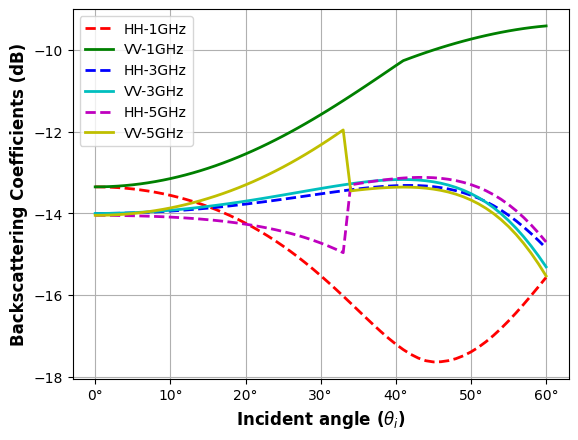

In [2]:
eps = 2+0.*1j
frqs = [1, 3, 5]

# Define the parameters
s = 0.05
a = 0.1
kappa_e = 1.0
d = 0.1
thetas = np.arange(0.00001, 61, 1)
phi_i = 0.
phi_s = 179.999
cl = 0.1
acftype = '1'

# Initialize defaultdicts to store the results
HH = defaultdict(list)
VV = defaultdict(list)
HV = defaultdict(list)
VH = defaultdict(list)

# Loop over the angles
for f in frqs:
    for theta_i in thetas:
        theta_s = theta_i

        # Create the S2RTR_DiffuseUB object
        vv, hh = S2RTR_DiffuseUB(
            f=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s, eps=eps, s=s, cl=cl, acftype=acftype, a=a, kappa_e=kappa_e, d=d)
        # print(f"Frequency: {f}, Theta_i: {theta_i}, HH: {hh}, VV: {vv}")
        # Append the results to the respective lists in the defaultdicts
        HH[f].append(hh)
        VV[f].append(vv)
        # HV[theta].append(hh)
        # VH[theta].append(vv)

# Plotting results
plt.figure(1)

# # Plotting HH and VV for each itype
plt.plot(thetas, HH[1], color='r', linewidth=2, label='HH-1GHz', linestyle='--')
plt.plot(thetas, VV[1], color='g', linewidth=2, label='VV-1GHz')
plt.plot(thetas, HH[3], color='b', linewidth=2, label='HH-3GHz', linestyle='--')
plt.plot(thetas, VV[3], color='c', linewidth=2, label='VV-3GHz')
plt.plot(thetas, HH[5], color='m', linewidth=2, label='HH-5GHz', linestyle='--')
plt.plot(thetas, VV[5], color='y', linewidth=2, label='VV-5GHz')


# Customizing plot appearance
plt.grid(True)

plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()

/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/aiem/core.py:415: RuntimeWarning: overflow encountered in power
  kscs2n = kscs2 ** fn
/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/aiem/core.py:417: RuntimeWarning: invalid value encountered in multiply
  term_common = temp1 * kscs2n * self.spectra_1


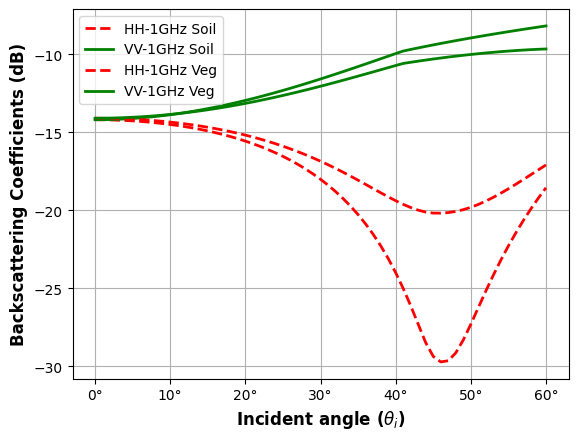

In [10]:
from aiem import AIEM
from ssrt import S2RTR_DiffuseUB_AllPol, toPower


# Define the parameters
s = 0.05
a = 0.1
kappa_e = 1.0
d = 0.1
thetas = np.arange(0.00001, 61, 1)
phi_i = 0.
phi_s = 179.999
cl = 0.1
acftype = '1'
# Initialize defaultdicts to store the results
HH_soil = defaultdict(list)
VV_soil = defaultdict(list)
HV_soil = defaultdict(list)
VH_soil = defaultdict(list)


HH_veg = defaultdict(list)
VV_veg = defaultdict(list)
HV_veg = defaultdict(list)
VH_veg = defaultdict(list)


# Loop over the angles
for f in frqs:
    for theta_i in thetas:
        theta_s = theta_i

        # --- Call AIEM surface scattering model ---
        intg = AIEM(frq_ghz=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s, sigma=s, cl=cl, eps=eps, acf_type=acftype)
        sig_s_vv, sig_s_hh, sig_s_hv, sig_s_vh = intg.run(todB=True)

        HH_soil[f].append(sig_s_hh)
        VV_soil[f].append(sig_s_vv)
        HV_soil[f].append(sig_s_hv)
        VH_soil[f].append(sig_s_vh)

        sig_s = {
            'vv': toPower(sig_s_vv),
            'hh': toPower(sig_s_hh),
            'hv': toPower(sig_s_hv),
            'vh': toPower(sig_s_vh)
        }

        # Create the S2RTR_DiffuseUB object
        sig_veg = S2RTR_DiffuseUB_AllPol(eps, a, kappa_e, d, theta_i, sig_s)
        # print(f"Frequency: {f}, Theta_i: {theta_i}, HH: {hh}, VV: {vv}")
        # Append the results to the respective lists in the defaultdicts
        # print(sig_veg)
        HH_veg[f].append(sig_veg['hh'])
        VV_veg[f].append(sig_veg['vv'])
        HV_veg[f].append(sig_veg['hv'])
        VH_veg[f].append(sig_veg['vh'])

# Plotting results
plt.figure(2)
# # Plotting HH and VV for each itype
plt.plot(thetas, HH_soil[1], color='r', linewidth=2, label='HH-1GHz Soil', linestyle='--')
plt.plot(thetas, VV_soil[1], color='g', linewidth=2, label='VV-1GHz Soil')

plt.plot(thetas, HH_veg[1], color='r', linewidth=2, label='HH-1GHz Veg', linestyle='--')
plt.plot(thetas, VV_veg[1], color='g', linewidth=2, label='VV-1GHz Veg')

# plt.plot(thetas, HH_soil[3], color='b', linewidth=2, label='HH-3GHz Soil', linestyle='--')
# plt.plot(thetas, VV_soil[3], color='c', linewidth=2, label='VV-3GHz Soil')
# plt.plot(thetas, HH_soil[5], color='m', linewidth=2, label='HH-5GHz Soil', linestyle='--')
# plt.plot(thetas, VV_soil[5], color='y', linewidth=2, label='VV-5GHz Soil')
# Customizing plot appearance
plt.grid(True)
plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()